In [2]:
!pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)


In [3]:
# Import necessary libraries for data analysis and visualization.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Creation of dataframe
clean_df = pd.read_csv('../data/clean_df.csv')

In [5]:
# Display summary information
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64857 entries, 0 to 64856
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              64857 non-null  int64  
 1   year            64857 non-null  int64  
 2   date            64857 non-null  object 
 3   time            64857 non-null  object 
 4   timezone        64857 non-null  object 
 5   datetime_utc    64857 non-null  object 
 6   state           64857 non-null  object 
 7   state_fips      64857 non-null  int64  
 8   magnitude       64857 non-null  float64
 9   injuries        64857 non-null  int64  
 10  fatalities      64857 non-null  int64  
 11  prop_loss       39872 non-null  float64
 12  start_lat       64857 non-null  float64
 13  start_lon       64857 non-null  float64
 14  end_lat         64857 non-null  float64
 15  end_lon         64857 non-null  float64
 16  length(m)       64857 non-null  float64
 17  width(m)        64857 non-null 

In [6]:
# Display the first 5 rows of the Dataframe
clean_df.head(5)

,id,year,date,time,timezone,datetime_utc,state,state_fips,magnitude,injuries,...,length(m),width(m),num_of_states,state_num,f1,f2,f3,f4,mag_estimated,avg_tempc_year
0,192,1950,1950-10-01,21:00:00,America/Chicago,1950-10-02T03:00:00Z,OK,40,1.0,0,...,25427.572,9.1440,1,1,25,0,0,0,False,10.773611
1,193,1950,1950-10-09,02:15:00,America/Chicago,1950-10-09T08:15:00Z,NC,37,3.0,3,...,3218.680,804.6720,1,1,47,0,0,0,False,10.773611
2,195,1950,1950-11-20,02:20:00,America/Chicago,1950-11-20T08:20:00Z,KY,21,2.0,0,...,160.934,9.1440,1,1,177,0,0,0,False,10.773611
3,196,1950,1950-11-20,04:00:00,America/Chicago,1950-11-20T10:00:00Z,KY,21,1.0,0,...,160.934,9.1440,1,1,209,0,0,0,False,10.773611
4,197,1950,1950-11-20,07:30:00,America/Chicago,1950-11-20T13:30:00Z,MS,28,1.0,3,...,3218.680,33.8328,1,1,101,0,0,0,False,10.773611


In [7]:
# Display the last 5 rows of the Dataframe
clean_df.tail(5)

,id,year,date,time,timezone,datetime_utc,state,state_fips,magnitude,injuries,...,length(m),width(m),num_of_states,state_num,f1,f2,f3,f4,mag_estimated,avg_tempc_year
64852,618354,2019,2019-09-09,14:37:00,America/Chicago,2019-09-09T19:37:00Z,SD,46,0.0,0,...,4152.0972,18.288,1,1,29,0,0,0,False,11.484259
64853,618355,2019,2019-09-09,14:39:00,America/Chicago,2019-09-09T19:39:00Z,SD,46,0.0,0,...,5149.8880,36.576,1,1,57,0,0,0,False,11.484259
64854,618358,2019,2019-09-09,17:55:00,America/Chicago,2019-09-09T22:55:00Z,SD,46,0.0,0,...,160.9340,9.144,1,1,37,0,0,0,False,11.484259
64855,618359,2019,2019-09-09,19:03:00,America/Chicago,2019-09-10T00:03:00Z,SD,46,1.0,0,...,2510.5704,73.152,1,1,37,0,0,0,False,11.484259
64856,618360,2019,2019-09-09,19:14:00,America/Chicago,2019-09-10T00:14:00Z,SD,46,0.0,0,...,305.7746,9.144,1,1,37,0,0,0,False,11.484259


In [8]:
# Display a random sample of the Dataframe
clean_df.sample(5)

,id,year,date,time,timezone,datetime_utc,state,state_fips,magnitude,injuries,...,length(m),width(m),num_of_states,state_num,f1,f2,f3,f4,mag_estimated,avg_tempc_year
57886,449915,2013,2013-06-04,17:53:00,America/Chicago,2013-06-04T22:53:00Z,CO,8,0.0,0,...,160.934,45.720,1,1,73,0,0,0,False,11.348148
63505,616646,2018,2018-09-01,17:08:00,America/Chicago,2018-09-01T22:08:00Z,MI,26,0.0,0,...,643.736,91.440,1,1,15,0,0,0,False,11.954630
47894,1068,2005,2005-07-06,20:00:00,America/Chicago,2005-07-07T01:00:00Z,GA,13,1.0,0,...,11265.380,274.320,1,1,151,0,0,0,False,12.020833
61617,615027,2017,2017-04-29,15:17:00,America/Chicago,2017-04-29T20:17:00Z,OK,40,1.0,0,...,11748.182,548.640,1,1,135,0,0,0,False,12.528704
8527,600,1965,1965-06-25,13:40:00,America/Chicago,1965-06-25T18:40:00Z,NM,35,0.0,0,...,160.934,9.144,1,1,5,0,0,0,False,10.936574


In [9]:
# Display descriptive statistics for the Dataframe
clean_df.describe()

,id,year,state_fips,magnitude,injuries,fatalities,prop_loss,start_lat,start_lon,end_lat,end_lon,length(m),width(m),num_of_states,state_num,f1,f2,f3,f4,avg_tempc_year
count,64857.000000,64857.000000,64857.000000,64857.000000,64857.000000,64857.000000,3.987200e+04,64857.000000,64857.000000,64857.000000,64857.000000,64857.000000,64857.000000,64857.000000,64857.000000,64857.000000,64857.000000,64857.000000,64857.000000,64857.000000
mean,83224.686988,1990.142051,29.309681,0.782845,1.472917,0.091463,2.018579e+06,37.139904,-92.843971,22.131771,-54.796585,5588.317208,95.836203,1.008496,0.991674,105.048645,8.433523,1.674083,0.514779,11.482200
std,195710.575998,18.784997,14.997250,0.901440,18.495863,1.492950,2.998601e+07,5.110332,8.698270,18.704945,45.814896,13391.760692,186.283169,0.093610,0.090867,97.070303,37.659184,16.650405,9.307526,0.555557
min,1.000000,1950.000000,1.000000,0.000000,0.000000,0.000000,5.000000e+01,17.721200,-163.530000,0.000000,-163.530000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.490741
25%,268.000000,1975.000000,18.000000,0.000000,0.000000,0.000000,6.000000e+03,33.200000,-98.500000,0.000000,-94.550000,160.934000,15.544800,1.000000,1.000000,37.000000,0.000000,0.000000,0.000000,11.044907
50%,552.000000,1993.000000,28.000000,1.000000,0.000000,0.000000,5.000000e+04,37.050000,-93.712000,32.143500,-83.673200,1174.818200,45.720000,1.000000,1.000000,85.000000,0.000000,0.000000,0.000000,11.418519
75%,978.000000,2006.000000,45.000000,1.000000,0.000000,0.000000,5.000000e+05,40.930000,-86.770000,38.450000,0.000000,4828.020000,91.440000,1.000000,1.000000,137.000000,0.000000,0.000000,0.000000,11.844907
max,618541.000000,2019.000000,78.000000,5.000000,1740.000000,158.000000,2.800100e+09,61.020000,-64.715100,61.020000,0.000000,377712.098000,4184.294400,3.000000,1.000000,810.000000,810.000000,710.000000,507.000000,12.935648


In [10]:
# Count and display the number of missing (null) values in each column of the Dataframe.
clean_df.isnull().sum()

id                    0
year                  0
date                  0
time                  0
timezone              0
datetime_utc          0
state                 0
state_fips            0
magnitude             0
injuries              0
fatalities            0
prop_loss         24985
start_lat             0
start_lon             0
end_lat               0
end_lon               0
length(m)             0
width(m)              0
num_of_states         0
state_num             0
f1                    0
f2                    0
f3                    0
f4                    0
mag_estimated         0
avg_tempc_year        0
dtype: int64

In [11]:
#check for duplicates in id column
 

In [12]:
def fig_size(height, width):
    """
    Set the figure size for Matplotlib/seaborn plots.

    Parameters:
        height (float): The height of the figure in inches.
        width (float): The width of the figure in inches.

    Usage:
        This function is used to specify the dimensions (height and width) of a Matplotlib
        figure before creating a plot. It allows you to control the size of the output plot."""

    plt.figure(figsize=(height, width))

In [13]:
def large_axis_numbers():
    """
    Disable scientific notation and use plain formatting for axis tick labels.

    Usage:
        Call this function before creating a Matplotlib plot to ensure that axis tick labels
        are displayed in plain formatting (not scientific notation)."""
    
    plt.ticklabel_format(useOffset=False, style='plain')

<AxesSubplot: >

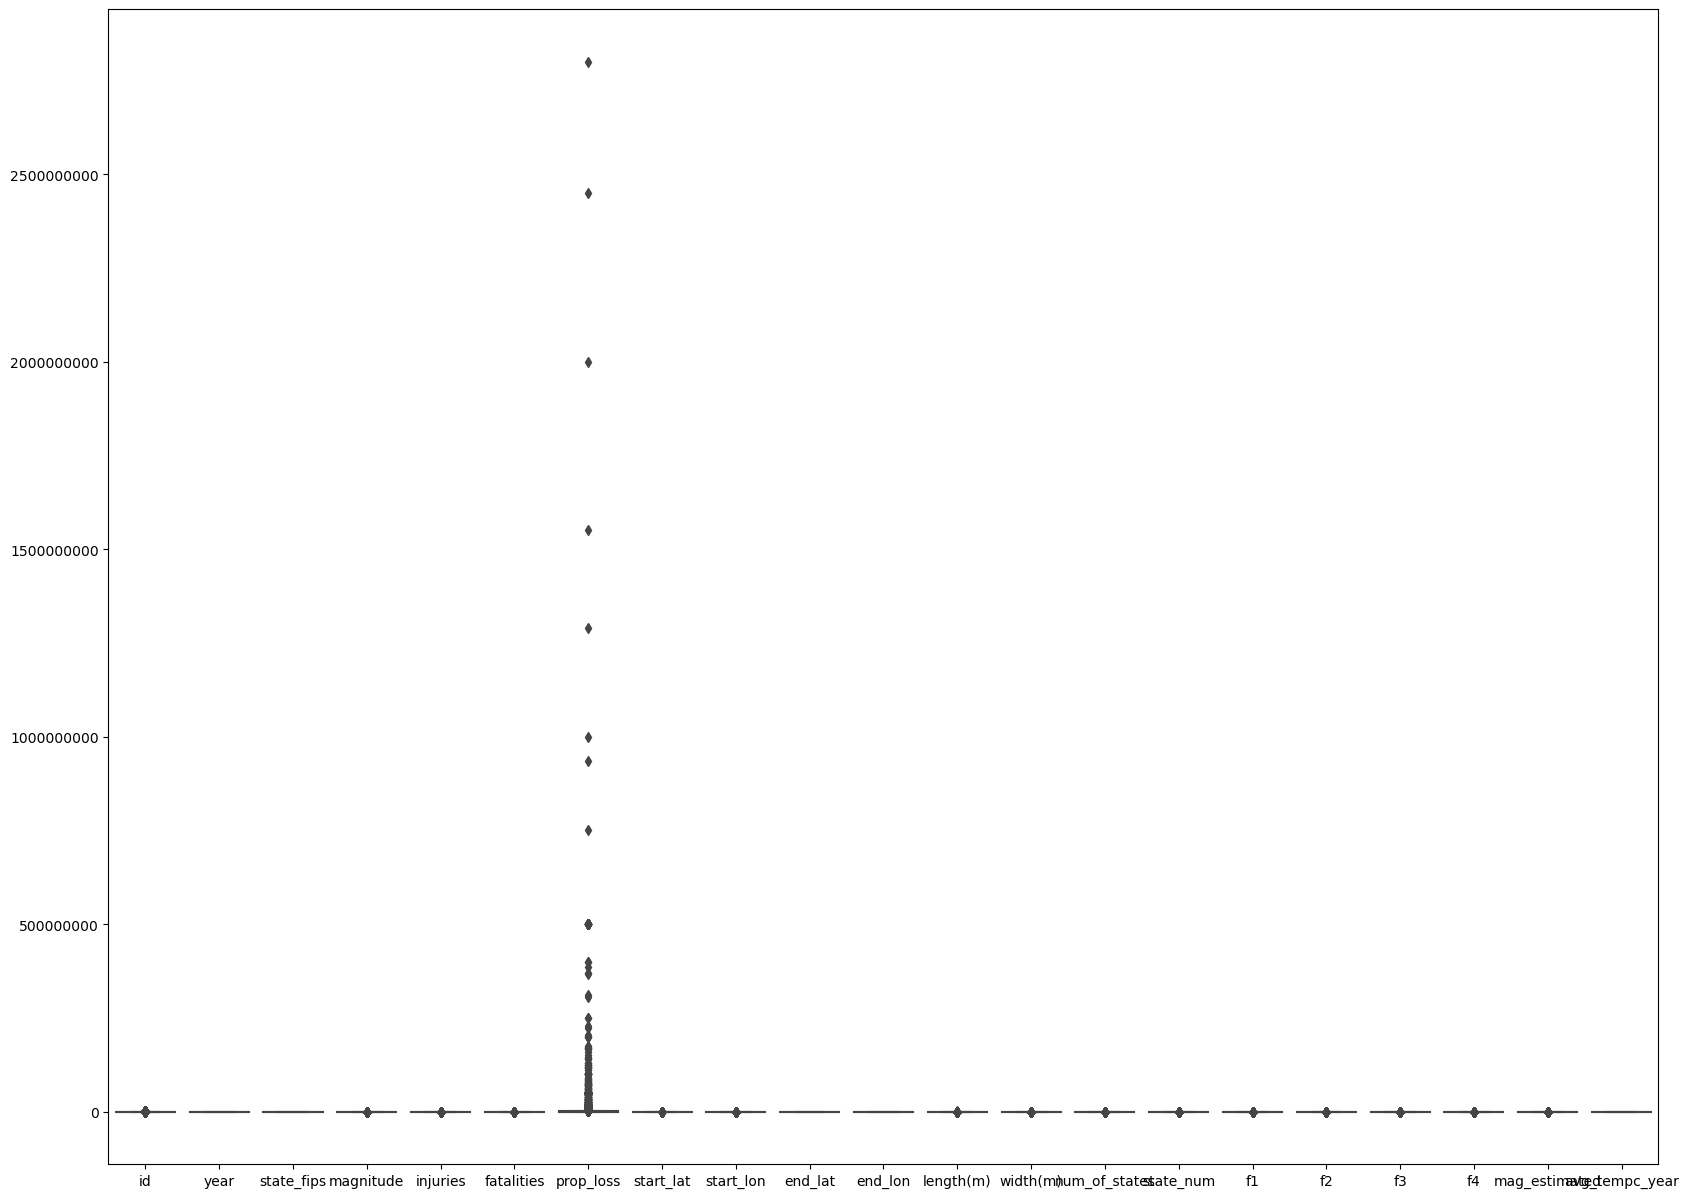

In [14]:
# Set the figure size
fig_size(20,15)

# Disable scientific notation
large_axis_numbers()

# Create a box plot with Seaborn
sns.boxplot(data=clean_df)

Appears to be several outliers in the prop_loss column, a strong tornado could cause a large amount of damage,
so there may be no reason to remove them.

<AxesSubplot: xlabel='magnitude', ylabel='prop_loss'>

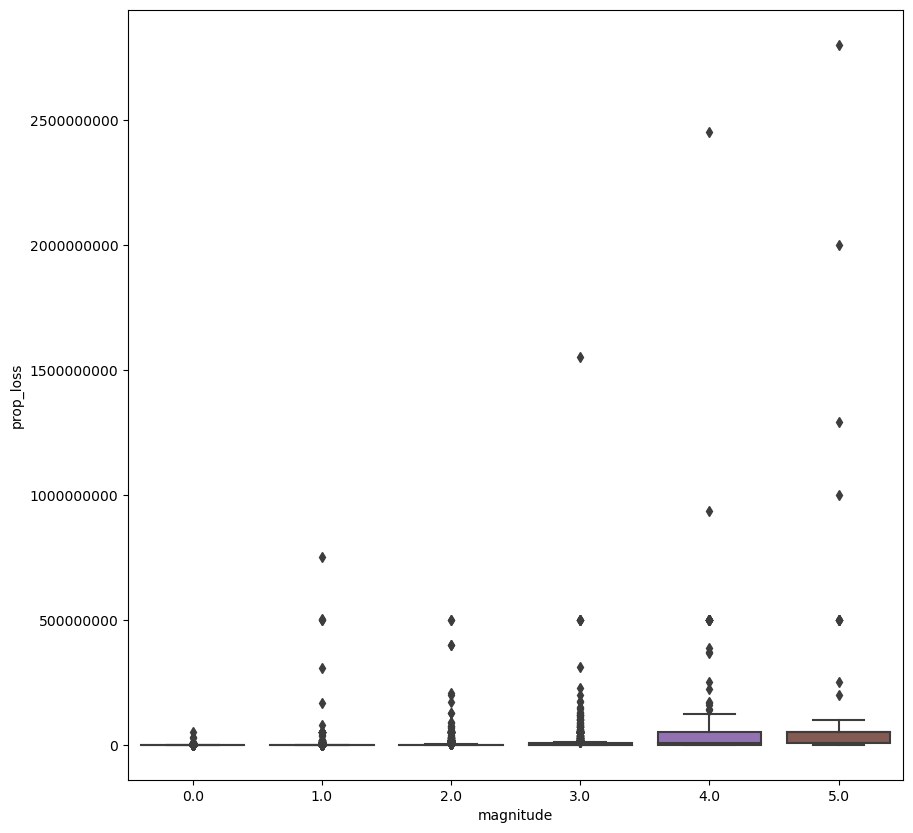

In [15]:
# Set the figure size
fig_size(10,10)

# Function to disable scientific notation
large_axis_numbers()

# Create boxplot with Seaborn
sns.boxplot(data=clean_df,y='prop_loss', x='magnitude')

In [16]:
# Calculate the correlation matrix
corr = clean_df[['year','magnitude','injuries','fatalities','prop_loss','length(m)','width(m)','avg_tempc_year']].corr()

In [17]:
corr

,year,magnitude,injuries,fatalities,prop_loss,length(m),width(m),avg_tempc_year
year,1.000000,-0.296112,-0.041385,-0.034142,0.021679,-0.069493,0.106594,0.637456
magnitude,-0.296112,1.000000,0.221748,0.195629,0.148810,0.439056,0.418881,-0.183591
injuries,-0.041385,0.221748,1.000000,0.759500,0.538393,0.251364,0.185530,-0.022850
fatalities,-0.034142,0.195629,0.759500,1.000000,0.489390,0.229922,0.171601,-0.010989
prop_loss,0.021679,0.148810,0.538393,0.489390,1.000000,0.152700,0.185632,0.007849
length(m),-0.069493,0.439056,0.251364,0.229922,0.152700,1.000000,0.364955,-0.025477
width(m),0.106594,0.418881,0.185530,0.171601,0.185632,0.364955,1.000000,0.076519
avg_tempc_year,0.637456,-0.183591,-0.022850,-0.010989,0.007849,-0.025477,0.076519,1.000000


In [18]:
# List the datatypes of the columns of the Dataframe
clean_df.dtypes

id                  int64
year                int64
date               object
time               object
timezone           object
datetime_utc       object
state              object
state_fips          int64
magnitude         float64
injuries            int64
fatalities          int64
prop_loss         float64
start_lat         float64
start_lon         float64
end_lat           float64
end_lon           float64
length(m)         float64
width(m)          float64
num_of_states       int64
state_num           int64
f1                  int64
f2                  int64
f3                  int64
f4                  int64
mag_estimated        bool
avg_tempc_year    float64
dtype: object

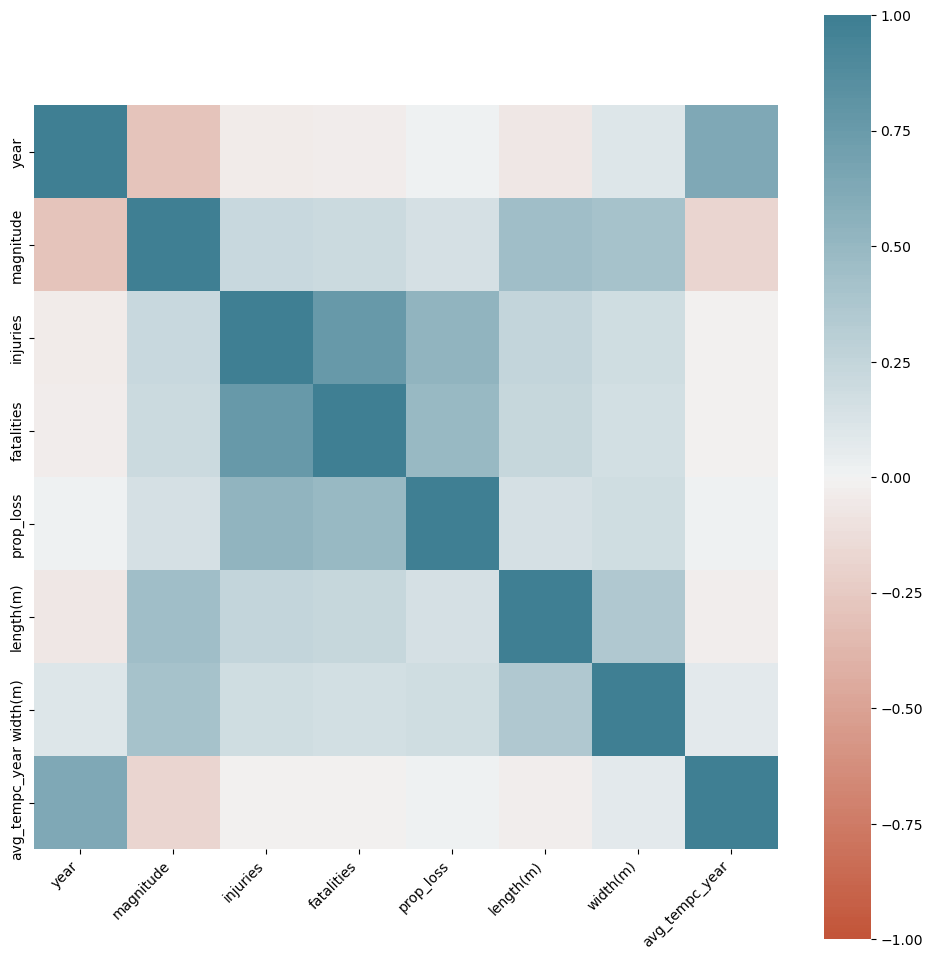

In [19]:
# Set the figure size
fig_size(12,12)

# Create heatmap with Seaborn
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
# Customize the x-axis tick labels
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [20]:
clean_df[['year', 'prop_loss']].head()

,year,prop_loss
0,1950,50000.0
1,1950,500000.0
2,1950,500000.0
3,1950,500000.0
4,1950,50000.0


<AxesSubplot: xlabel='year', ylabel='prop_loss'>

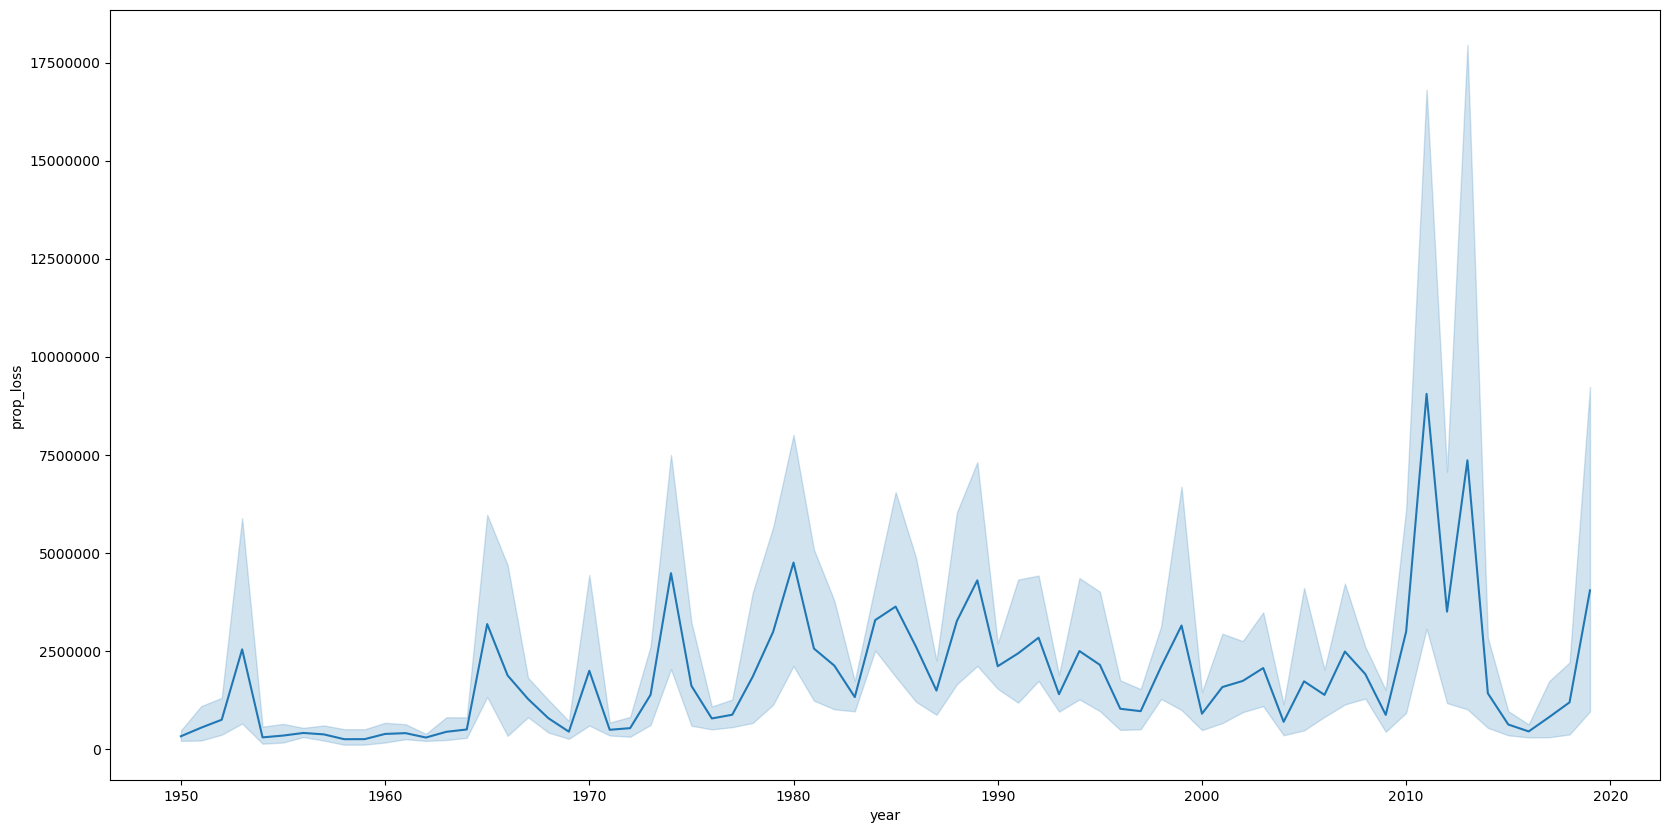

In [23]:
# Set the figure size
fig_size(20,10)

# Function to disable scientific notation
large_axis_numbers()

x_value = clean_df['year'].values
y_value = clean_df['prop_loss'].values

# print(type(x_value))

# Create lineplot with Seaborn
sns.lineplot(data=clean_df,x='year',y='prop_loss')
# sns.lineplot(x=x_value,y=x_value)


<AxesSubplot: xlabel='year', ylabel='Count'>

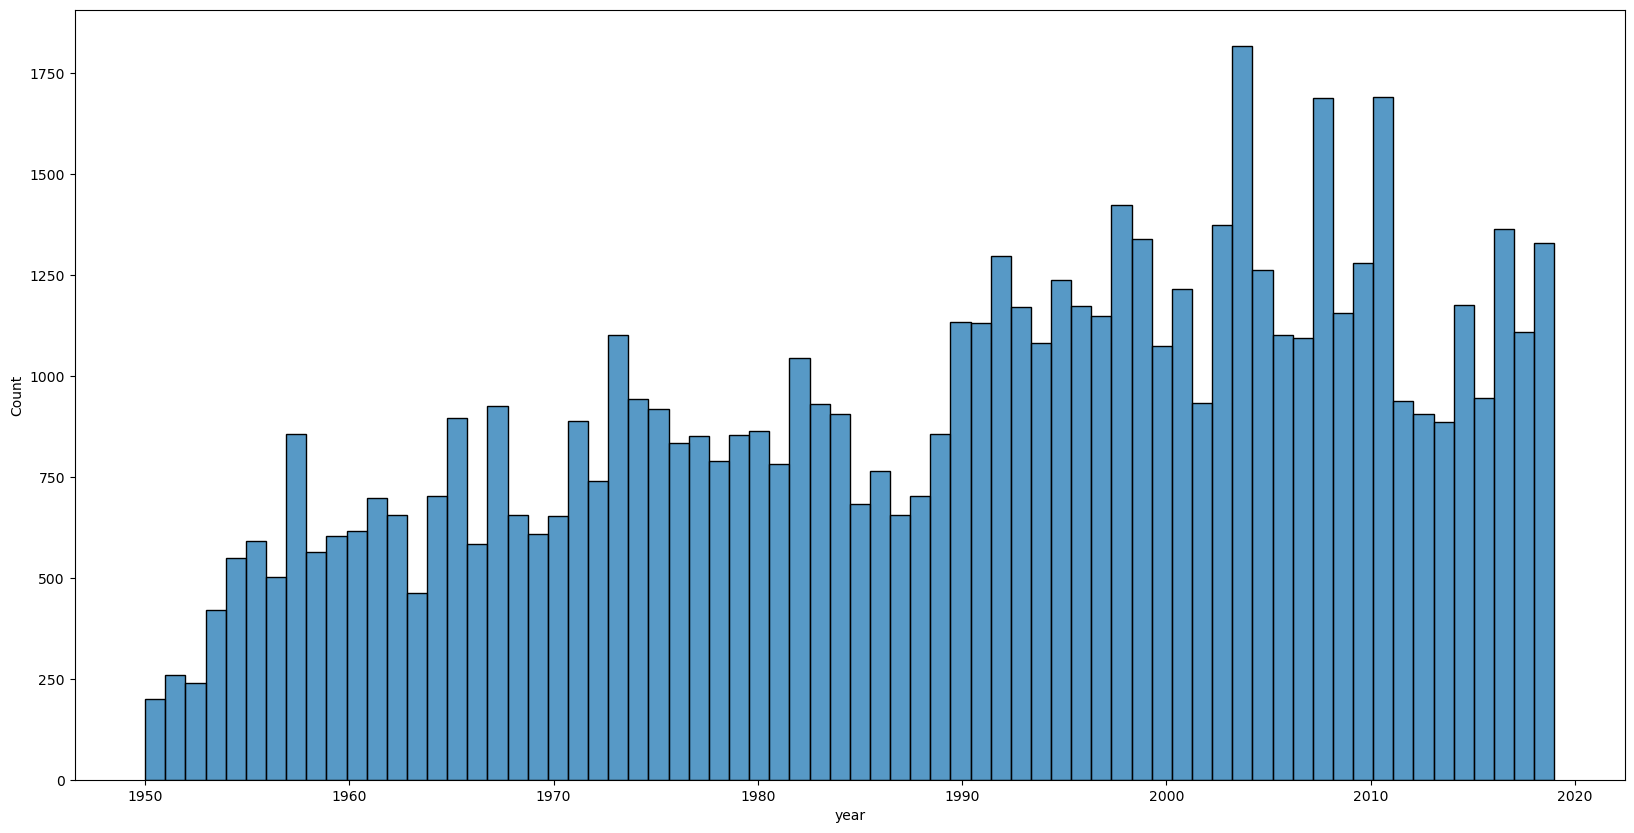

In [22]:
# Set figure size
fig_size(20,10)

# Function to disable scientific notation
large_axis_numbers()

# Create histogram with Seaborn
sns.histplot(data=clean_df,x='year',bins=70)

<AxesSubplot:xlabel='state', ylabel='Count'>

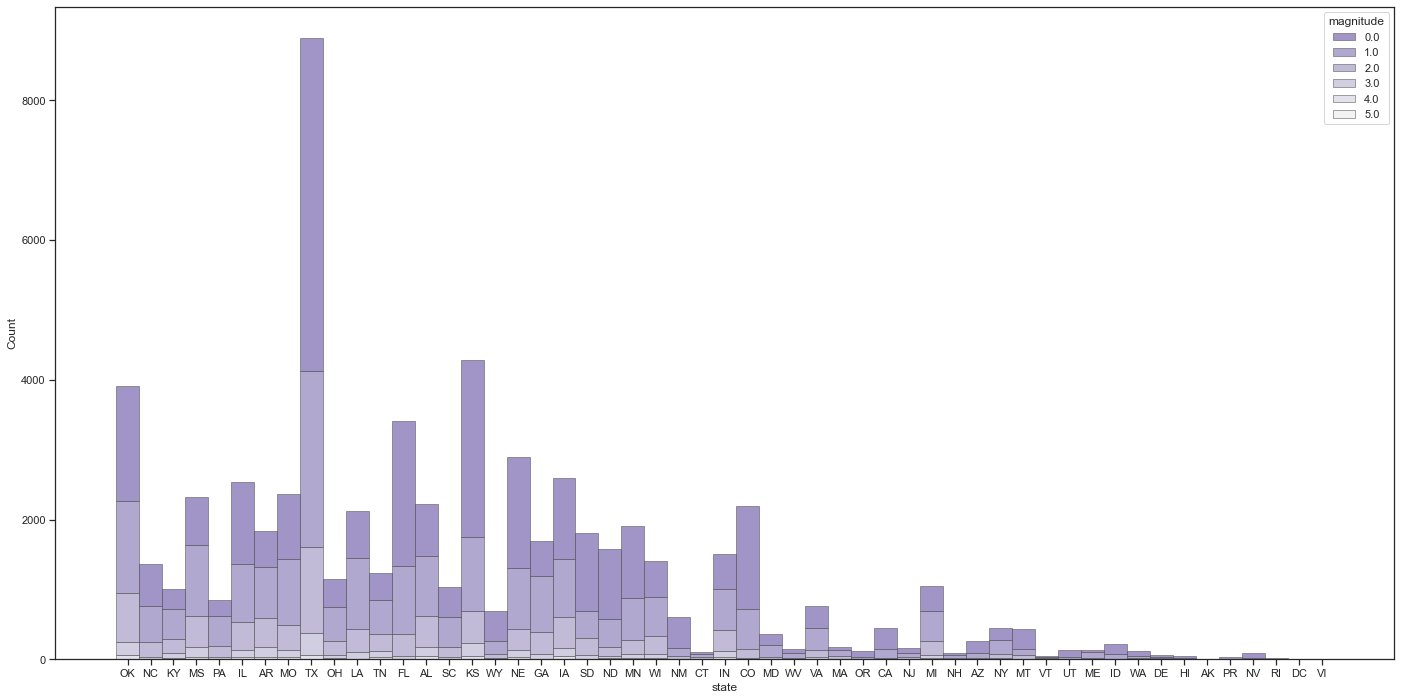

In [25]:
# Set Seaboen theme
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(24, 12))

# Create histogram with Seaborn
sns.histplot(
    clean_df,
    x=clean_df['state'], hue="magnitude",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5)

<AxesSubplot:xlabel='year', ylabel='avg_tempc_year'>

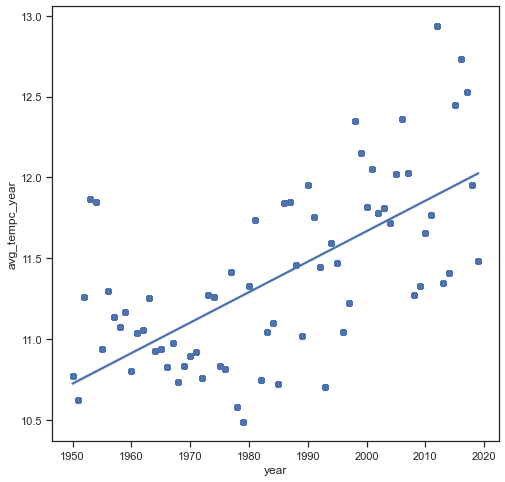

In [26]:
# Set figure size
fig_size(8,8)

# Create regression plot with Seaborn
sns.regplot(data=clean_df, x='year', y='avg_tempc_year')

<AxesSubplot: xlabel='year', ylabel='fatalities'>

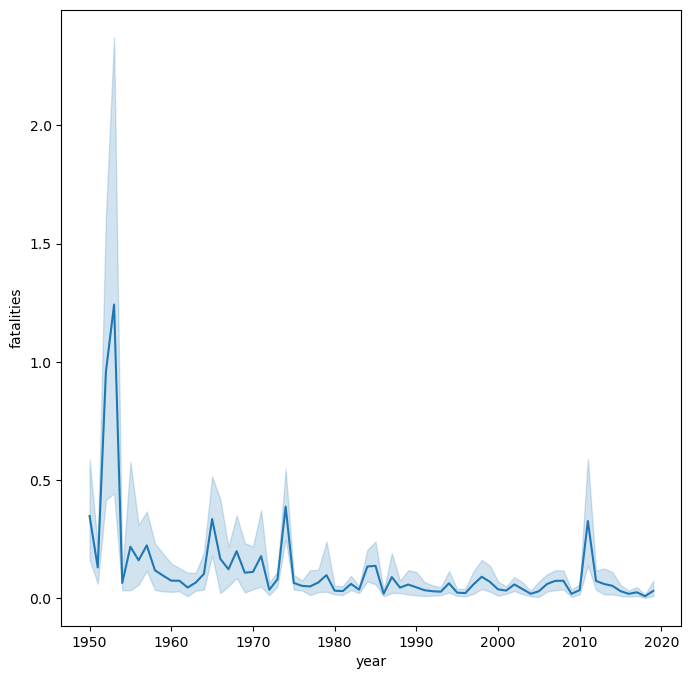

In [24]:
# Set figure size
fig_size(8,8)

# Function to disable scientific notation
large_axis_numbers()

# Create line plot with Seaborn
sns.lineplot(data=clean_df, x='year', y='fatalities')

<AxesSubplot:xlabel='magnitude', ylabel='prop_loss'>

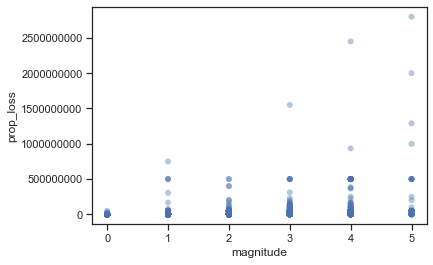

In [28]:
# test: how does removing prop loss nan's
temp_df = clean_df.dropna(subset=['prop_loss'])
large_axis_numbers()
sns.scatterplot(data=temp_df, y="prop_loss", x="magnitude", edgecolor = 'none'
                ,alpha = .4)

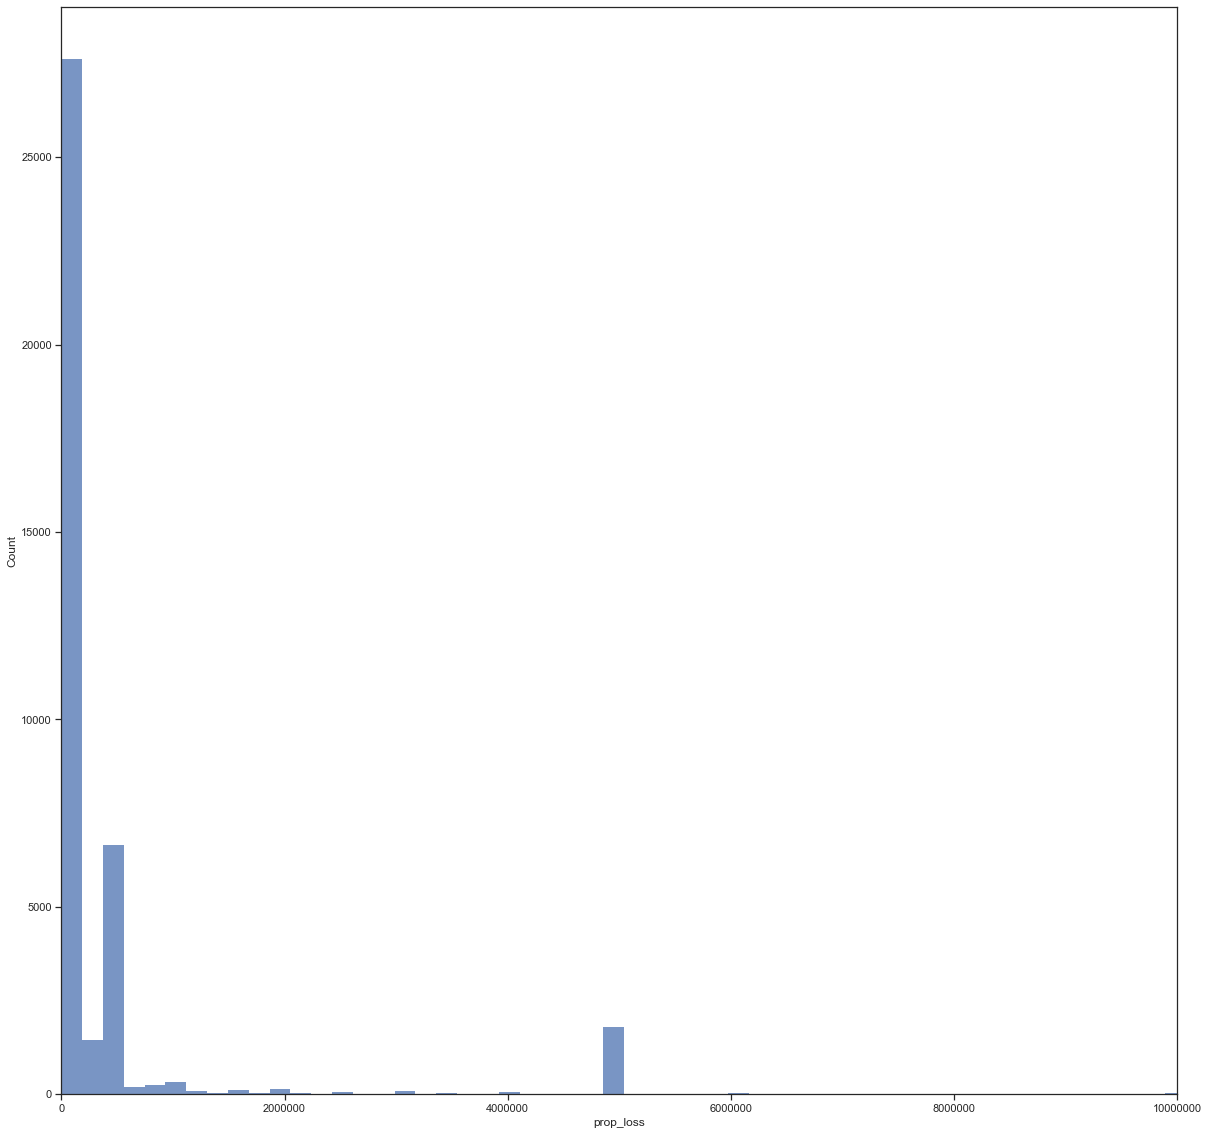

0         50000.0
1        500000.0
2        500000.0
3        500000.0
4         50000.0
           ...   
64852         NaN
64853         NaN
64854         NaN
64855         NaN
64856         NaN
Name: prop_loss, Length: 64857, dtype: float64

In [40]:
# histogram of property loss values ?????
fig_size(20,20)
large_axis_numbers()
data = clean_df['prop_loss']
plot = sns.histplot(data=clean_df, x=data, bins=15000)
plot.set_xlim(0, 10000000)
plt.show()
data